In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# read CSVs
movies = pd.read_csv('E:\RecSys-Materials\ml-latest-small/movies.csv')
ratings = pd.read_csv('E:\RecSys-Materials\ml-latest-small/ratings.csv')

# merge on movieId column
data = pd.merge(left=movies, right=ratings, on='movieId')

In [2]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [3]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [4]:
data.shape

(100004, 6)

In [5]:
data['movieId'].nunique()

9066

In [6]:
years = []

for title in data['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)

data['moviePubYear'] = years
print(len(data[data['moviePubYear'] == 9999]))

9


In [7]:
print(data[(data['moviePubYear']==9999)])

        movieId                                    title  \
96167     89045                         Rocky VI (1986)    
96623     92206                 Hostel: Part III (2011)    
96814     94494                       96 Minutes (2011)    
97956    104595  Family Band: The Cowsills Story (2011)    
98382    108548             Big Bang Theory, The (2007-)   
98613    110748                        Wake Wood (2010)    
99863    143410                               Hyena Road   
99929    151307                The Lovers and the Despot   
100000   162376                          Stranger Things   

                      genres  userId  rating   timestamp  moviePubYear  
96167                 Comedy     333     4.5  1441199805          9999  
96623        Horror|Thriller     262     2.0  1434028881          9999  
96814         Drama|Thriller     624     2.5  1397303036          9999  
97956            Documentary     547     4.0  1383015043          9999  
98382                 Comedy     2

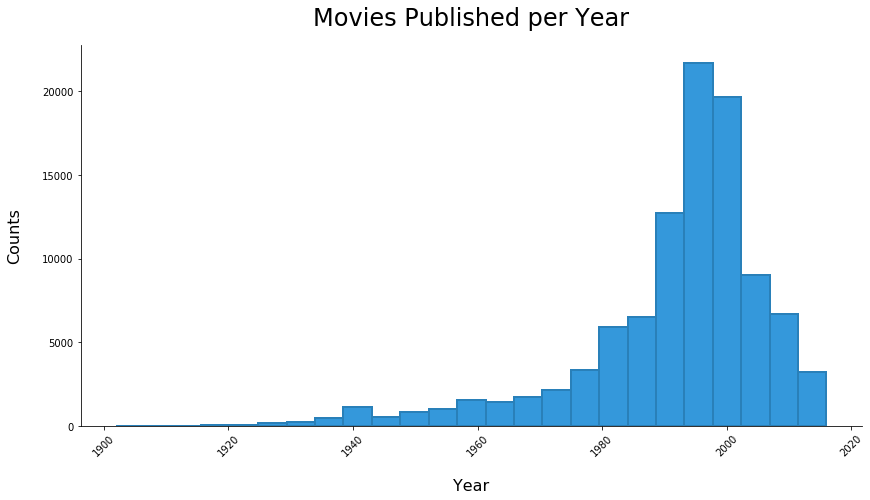

In [8]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):

    if attribute == 'moviePubYear':

        dataset = dataset[dataset['moviePubYear'] != 9999]

        

    fig, ax = plt.subplots(figsize=(14, 7))

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)

    ax.set_title(title, fontsize=24, pad=20)

    ax.set_xlabel(xlab, fontsize=16, labelpad=20)

    ax.set_ylabel(ylab, fontsize=16, labelpad=20)

    

    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)

    

    plt.xticks(rotation=45)

    

    

make_histogram(data, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')

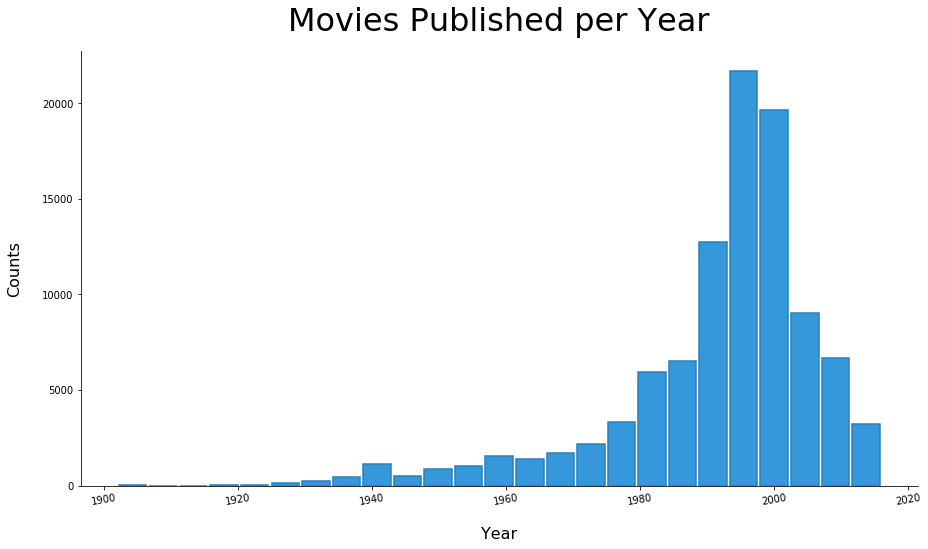

In [9]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):

    if attribute == 'moviePubYear':

        dataset = dataset[dataset['moviePubYear'] != 9999]

        

    fig, ax = plt.subplots(figsize=(15, 8))

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)
   # ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)


    ax.set_title(title, fontsize=32, pad=20)

    ax.set_xlabel(xlab, fontsize=16, labelpad=20)

    ax.set_ylabel(ylab, fontsize=16, labelpad=20)

    

    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=1.5,rwidth=0.9)

    

    plt.xticks(rotation=10)

    

    

make_histogram(data, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')

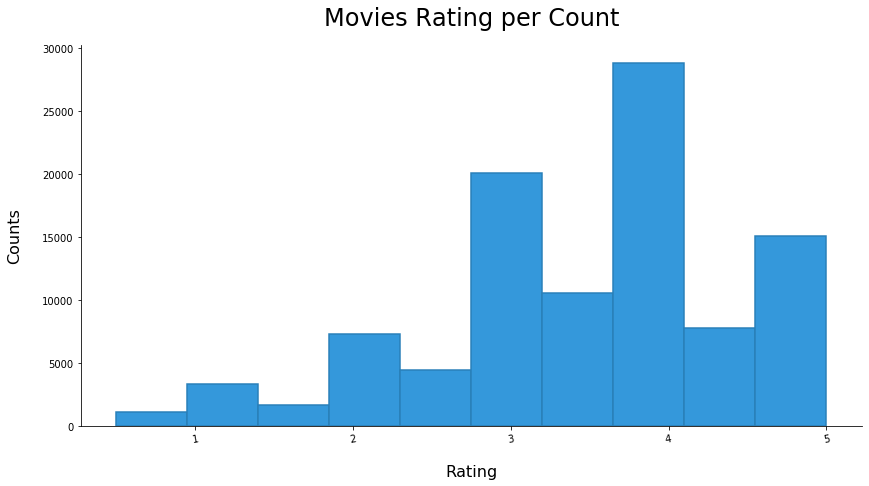

In [10]:
def make_histogram(dataset, attribute, bins=10, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):

    if attribute == 'rating':

        dataset = dataset[dataset['rating'] != 9999]

        

    fig, ax = plt.subplots(figsize=(14, 7))

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)

    ax.set_title(title, fontsize=24, pad=20)

    ax.set_xlabel(xlab, fontsize=16, labelpad=20)

    ax.set_ylabel(ylab, fontsize=16, labelpad=20)

    

    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color,linewidth=1.5,rwidth=10 )

    

    plt.xticks(rotation=10)

    

    

make_histogram(data, 'rating', title='Movies Rating per Count', xlab='Rating', ylab='Counts')

In [11]:
genre_df = pd.DataFrame(data['genres'].str.split('|').tolist(), index=data['movieId']).stack()

genre_df = genre_df.reset_index([0, 'movieId'])

genre_df.columns = ['movieId', 'Genre']

In [12]:
genre_df.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


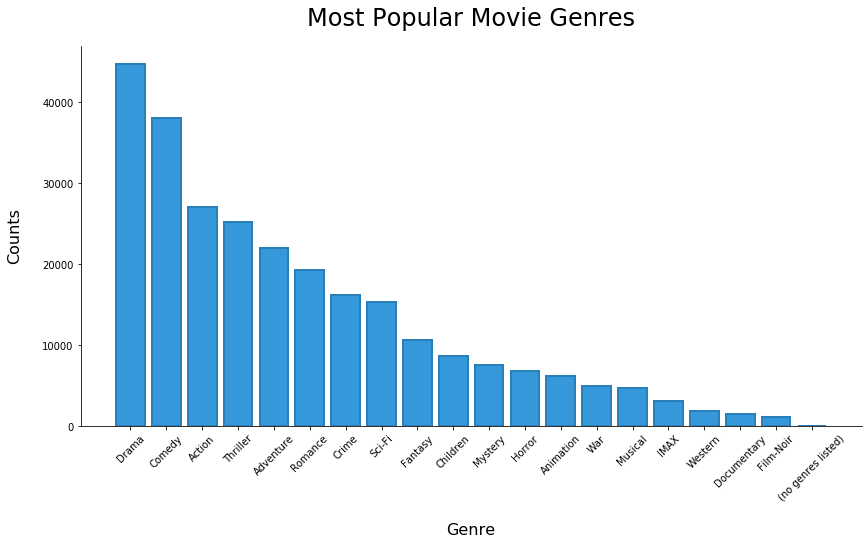

In [13]:
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):

    if sort_index == False:

        xs = dataset[attribute].value_counts().index

        ys = dataset[attribute].value_counts().values

    else:

        xs = dataset[attribute].value_counts().sort_index().index

        ys = dataset[attribute].value_counts().sort_index().values

        

    

    fig, ax = plt.subplots(figsize=(14, 7))

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)

    ax.set_title(title, fontsize=24, pad=20)

    ax.set_xlabel(xlab, fontsize=16, labelpad=20)

    ax.set_ylabel(ylab, fontsize=16, labelpad=20)

    

    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)

    plt.xticks(rotation=45)

    

    

make_bar_chart(genre_df, 'Genre', title='Most Popular Movie Genres', xlab='Genre', ylab='Counts')

In [14]:
values = defaultdict(list)

for ind, row in data.iterrows():

    for genre in row['genres'].split('|'):

        values[genre].append(row['rating'])

genre_lst, rating_lst = [], []

for key, item in values.items():

    if key not in [0, 1]:

        genre_lst.append(key)

        rating_lst.append(np.mean(item))

genres_with_ratings = pd.DataFrame([genre_lst, rating_lst]).T

genres_with_ratings.columns = ['Genre', 'Mean_Rating']

In [15]:
genres_with_ratings

,Genre,Mean_Rating
0,Adventure,3.52039
1,Animation,3.63606
2,Children,3.46619
3,Comedy,3.44604
4,Fantasy,3.51806
5,Romance,3.55616
6,Drama,3.68178
7,Action,3.44561
8,Crime,3.67964
9,Thriller,3.5185


In [16]:
genres_with_ratings['Genre']

0              Adventure
1              Animation
2               Children
3                 Comedy
4                Fantasy
5                Romance
6                  Drama
7                 Action
8                  Crime
9               Thriller
10                Horror
11               Mystery
12                Sci-Fi
13           Documentary
14                  IMAX
15                   War
16               Musical
17               Western
18             Film-Noir
19    (no genres listed)
Name: Genre, dtype: object

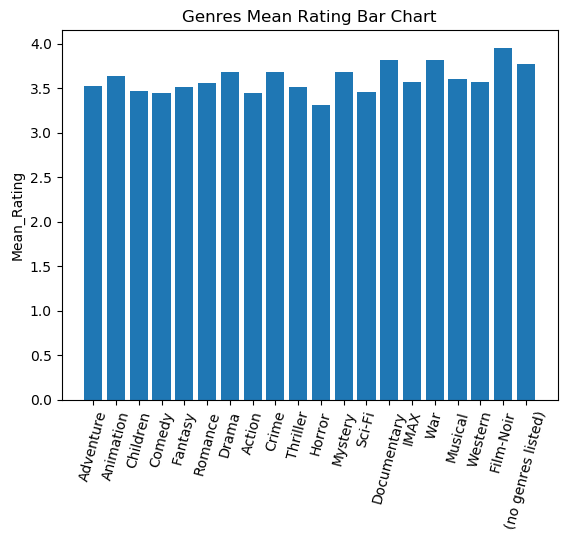

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = genres_with_ratings['Genre']
y_pos = np.arange(len(objects))
performance = genres_with_ratings['Mean_Rating']

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Mean_Rating')
plt.title('Genres Mean Rating Bar Chart')
plt.xticks(rotation=75)

plt.show()

In [18]:
num_ratings = pd.DataFrame(data.groupby('movieId').count()['rating']).reset_index()

data = pd.merge(left=data, right=num_ratings, on='movieId')

data.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [19]:
data.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:10]

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
11118,356,Forrest Gump (1994),Comedy|Drama|Romance|War,197,3.0,975428956,1994,341
8901,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,478,5.0,1446621714,1994,324
9756,318,"Shawshank Redemption, The (1994)",Crime|Drama,502,5.0,861304067,1994,311
18228,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,479,5.0,1409004732,1991,304
7619,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,242,5.0,956684986,1977,291
14474,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,279,5.0,838231458,1993,274
51880,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,242,5.0,956684185,1999,259
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995,247
15689,527,Schindler's List (1993),Drama|War,169,5.0,1234228124,1993,244
17467,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,251,4.0,1476478052,1991,237


In [20]:
NumRatingSort=data.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:10]

In [21]:
RatingSort=NumRatingSort.sort_values(by='rating', ascending=False).drop_duplicates('movieId')[:10]

In [22]:
RatingSort

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
8901,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,478,5.0,1446621714,1994,324
9756,318,"Shawshank Redemption, The (1994)",Crime|Drama,502,5.0,861304067,1994,311
18228,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,479,5.0,1409004732,1991,304
7619,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,242,5.0,956684986,1977,291
14474,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,279,5.0,838231458,1993,274
51880,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,242,5.0,956684185,1999,259
15689,527,Schindler's List (1993),Drama|War,169,5.0,1234228124,1993,244
17467,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,251,4.0,1476478052,1991,237
11118,356,Forrest Gump (1994),Comedy|Drama|Romance|War,197,3.0,975428956,1994,341
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995,247


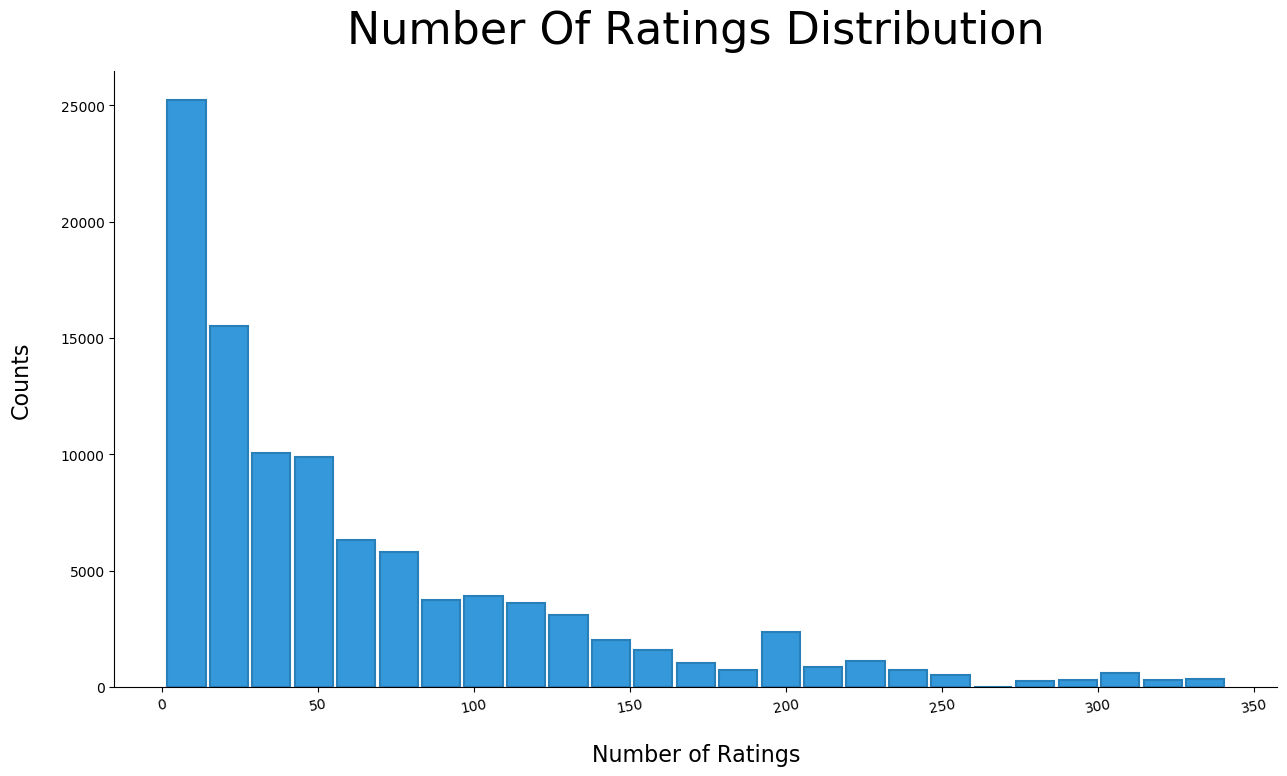

In [23]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):

    if attribute == 'moviePubYear':

        dataset = dataset[dataset['moviePubYear'] != 9999]

    if sort_index == False:

        xs = dataset[attribute].value_counts().index

        ys = dataset[attribute].value_counts().values

    else:

        xs = dataset[attribute].value_counts().sort_index().index

        ys = dataset[attribute].value_counts().sort_index().values
     

    fig, ax = plt.subplots(figsize=(15, 8))

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)
   # ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)


    ax.set_title(title, fontsize=32, pad=20)

    ax.set_xlabel(xlab, fontsize=16, labelpad=20)

    ax.set_ylabel(ylab, fontsize=16, labelpad=20)

    

    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=1.5,rwidth=0.9)

    

    plt.xticks(rotation=10)

    

    

make_histogram(data, 'numRatings', title='Number Of Ratings Distribution', xlab='Number of Ratings', ylab='Counts')

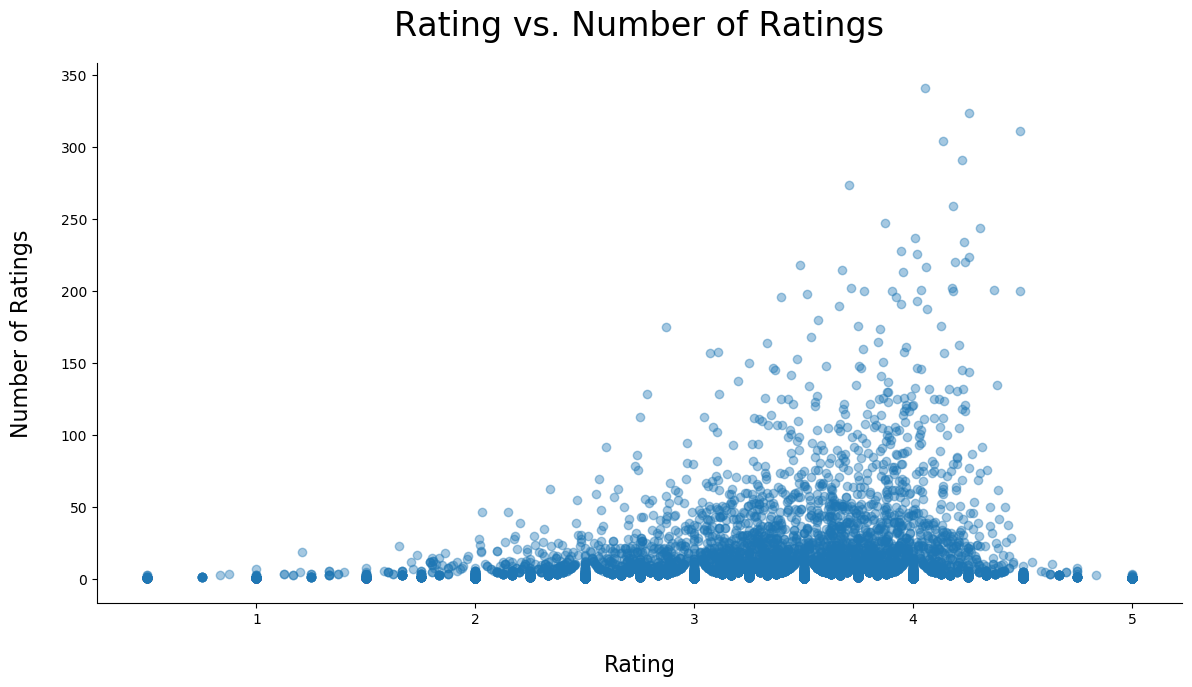

In [24]:
ratings_df = pd.DataFrame()

ratings_df['Mean_Rating'] = data.groupby('title')['rating'].mean().values

ratings_df['Num_Ratings'] = data.groupby('title')['rating'].count().values





fig, ax = plt.subplots(figsize=(14, 7))

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)

ax.set_xlabel('Rating', fontsize=16, labelpad=20)

ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)



plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.4)

In [25]:
data.head()

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995,247
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,1995,247
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,1995,247
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,1995,247
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,1995,247


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity###### helper functions. Use them when needed #######


In [92]:
def get_title_from_index(index):
	return df[data.movieId == movieId]["title"].values[1]

def get_index_from_title(title):
	return data[movie_user_likes]
    #return df[data.title == title]["movieId"].values[1]
##################################################

In [93]:
##Step 2: Select Features

features = ['genres']

In [94]:
##Step 3: Create a column in DF which combines all selected features
df = data[features]

In [95]:
df.head()

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Animation|Children|Comedy|Fantasy
2,Adventure|Animation|Children|Comedy|Fantasy
3,Adventure|Animation|Children|Comedy|Fantasy
4,Adventure|Animation|Children|Comedy|Fantasy


In [96]:
##Step 4: Create count matrix from this new combined column
cv = CountVectorizer()

count_matrix = cv.fit_transform(df)

In [97]:
##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix) 
movie_user_likes = "Avatar (2009)"
#movie_user_likes = "Toy Story 3"
#movie_user_likes = "World War Z"
#movie_user_likes = "Brave"
#movie_user_likes = "Ice Age: Continental Drift"

In [98]:
## Step 6: Get index of this movie from its title
movie_index = get_index_from_title(movie_user_likes)

KeyError: 'movieId'

In [36]:
similar_movies =  list(enumerate(cosine_sim[movie_index]))

NameError: name 'movie_index' is not defined

In [37]:
## Step 7: Get a list of similar movies in descending order of similarity score
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)

NameError: name 'similar_movies' is not defined

In [ ]:
## Step 8: Print titles of first 50 movies
i=0
for element in sorted_similar_movies:
		print (get_title_from_index(element[0]))
		i=i+1
		if i>5:
			break